In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

from core.rnn import create_model, train, load_data

LABELS = ["walking", "stairs_down", "stairs_up", "other"]

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________
Train on 155 samples, validate on 39 samples
Epoch 1/50
155/155 [==============================] - 2s 14ms/step - loss: 1.7422 - acc: 0.2194 - val_loss: 1.5460 - val_acc: 0.2051
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 1.5365 - acc: 0.2194 - val_loss: 1.3994 - val_acc: 0.2051
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 1.4068 - acc: 0.21

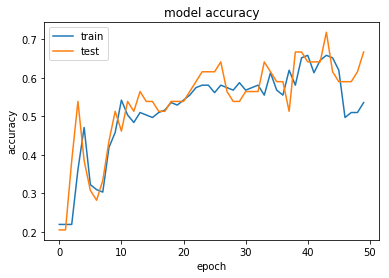

In [3]:
model_my = create_model(128, LABELS)

x_my, y_my = load_data("../data/dataset.csv", 128, LABELS)
x_train_my, x_test_my, y_train_my, y_test_my = train_test_split(
    x_my, y_my, test_size=0.2, random_state=np.random.randint(0, 42)
)

train(
    model_my,
    x_train_my,
    y_train_my,
    x_test_my,
    y_test_my,
    epochs=50,
    batch_size=128
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 11s 1ms/step - loss: 1.0954 - acc: 0.5668 - val_loss: 0.9794 - val_acc: 0.5782
Epoch 2/50
7352/7352 [==============================] - 10s 1ms/step - loss: 1.0102 - acc: 0.5861 - val_loss: 1.2484 - val_acc: 0.5667
Epoch 3/50
7352/7352 [==============================] - 10s 1ms/step - loss: 0.9760 

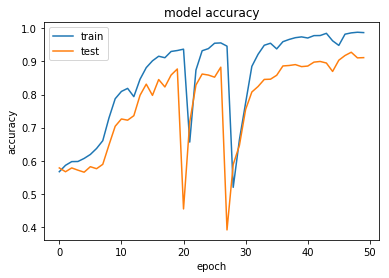

In [4]:
model_uci = create_model(128, LABELS)

x_train_uci, y_train_uci = load_data("../data/uci_train_4_labels.csv", 128, LABELS)
x_test_uci, y_test_uci = load_data("../data/uci_test_4_labels.csv", 128, LABELS)

train(
    model_uci,
    x_train_uci,
    y_train_uci,
    x_test_uci,
    y_test_uci,
    epochs=50,
    batch_size=128
)